<h1 align="center">Modelos de Machine Learning para Séries Temporais</h1>
<p align="center"><img src=https://ichi.pro/assets/images/max/724/0*k2bCMOixbQLU0UDA length=300, width=450></p>

<p align="justify">Neste tópico, passaremos pelos métodos utilizados como linha de base <i>Baseline</i> ou que se destaca pelo desempenho ou facilidade de uso ou aplicabilidade. Os algoritmos que veremos são considerados pelo seu alto desempenho em termos de previsão.</p>

<h2>Métodos e Bibliotecas de Machine Learning para Séries Temporais</h2>
<p align ="justify">Ao longo dos estudos, foram apresentadas os seguintes algoritmos: SilverKite, gradient boosting e K-nearst neighbors. Recentemente, a biblioteca Kats do Facebook e a Greykite ganharam destaque por conta da sua performance e desempenho nas tarefas de predição. Porém, a TSFresh e a SkTime constam como 1º e 2º lugar, respectivamente, dentre todas as bibliotecas lançadas até o momento. Uma questão importante a ser considerada é a Validação, que veremos em seguida.</p>

<h2>Validação</h2>
<p align = "justify">Muitas vezes, para realizar as tarefas de Aprendizado de Máquina, utilizando a Validação Cruzada <i>K-Fold</i>, onde a divisão dos dados é realizada de forma pseudo-aleatória, de forma que os conjuntos de treinamento e o teste/validação possam ser de qualquer parte dos dados, desde que não tenham sido usados para o treinamento. Com dados de séries temporais, nos utilizaremos para o treinamento os dados anteriores e o testaremos na fatia de dados de mais novos. Isso nos dará uma visão mais realista do desempenho uma vez que o modelo for implementado.</p>
<p align="justify">Na validação <i>Walk-Forward</i> treinaremos um segmento inicial dos dados e depois testaremos em um período após o conjunto de treinamento. Em seguinda, avançaremos e repetiremos o processo. Desta forma, teremos um período fora da amostra e poderemos combinar os resultados sobre esses períodos. Com o <i>Walk-Forward</i>, é menos provável que ocorra o <i>Overfitting<i/>.</p>

<h2>KNN com a Distorção do Tempo Dinâmico</h2>
<p align="justify">O KNN é um método de Aprendizado de Máquina bem conhecido. Com ele, podemos obter a distância dos pontos de dados semelhantes.Então, podemos pegar os rótulos conhecidos desses vizinhos mais próximos como saída e integrá-los de alguma forma usando uma função. </p>
<p align="center"><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png?20101222011435></p>
<p align="center">KNN para classificação</p>
<p align="justify">Neste caso, nós já conhecemos alguns pontos. Na ilustração anterior, esses pontos são indicados como quadrados e triângulos, representando pontos de dados de duas classes, respectivamente. Dado um novo ponto (círculo), nós encontramos o ponto mais próximo dos dados conhecidos que apontam para ele. No caso acima, podemos supor que o círculo pertence à classe triângulo também.</p>
<p align="justify">Embora, conceitualmente simples, este método muitas vezes serve como linha de base ou até de forma bem competitiva com outros algoritmos de aprendizagem de máquina mais sofisticados, mesmo quando comparado ao KNN (k=1). Os hiperparâmetros mais importantes deste algoritmo são:</p>
<li>O número de vizinho (k) que desejamos como base na nossa saída</li>
<li>A função de integração (valor médio ou mais frequente)</li>
<li>A função de distância que é usado para encontrar os pontos de dados.</li>

<p align="justify">A distorçar de Tempo dinâmico é uma medida que é utilizada para comparar a similaridade (ou equivalência, a distância) entre duas séries temporais. Nós utilizamos o KNN em combinação com Distorção de Tempo Dinâmico (DTW) como medida de distância para encontrar séries temporais similares. Este método provou ser difícil de vencer, embora outros métodos <i>state of art</i> já o tenha superado.</p>

<h2>Silverkite</h2>
<p align="justify">O algoritmo Silverkite vêm junto com a biblioteca Greykite lançada pela LinkdIn. De acordo com o LinkdIn, ele pode lidar com diferentes tipos de tendências e sazonalidades, como eventos de hora em hora, diários, semanais, repetidos e feriados, além de efeitos de curto alcance. Dentro do LinkdIn, ele é usado tanto para prazo curto, quanto para prazo longo, com horizontes de previsão como 1 ano a frente.</p>
<p align="justify">Silverkite também constrói variáveis indicadoras para feriados. Feriados podem ser especificados por nome ou por país, ou ainda, pode ser totalmente personalizado. Os pontos de mudança podem ser especificados manualmente ou os candidatos podem ser detectados automaticamente com um modelo de regressão e, posteriomente, selecionado usando o algoritmo de LASSO. Além de tendência, sazonalidade e feriados, Silverkite incluiu um termo que é calculado com base em médias em janelas, em vez de levar atrasos (<i>lags</i>) independentemente.</p>

<h2>Gradiente boosting</h2>
<p align="justify">O Gradient Boosted Tree é um conjunto de árvores, semelhante às Florestas Aleatórias (Random Forest), no entando, como este é um algoritmo de reforço, cada árvore é calculada para reduzir incrementalmente o erro. A cada nova iteração uma árvore é escolhida e sua previsão é adicionada às previsões anteriores com base nos pesos. Há um prazo de regularização que penaliza a complexidade e reduz o <i>overfitting</i>, semelhante ao <i>Regularized Greedy Forest (GDE)</i>.</p>
<p align="justify">Especialmente, em casos de regressãos, o <i>XGBoost</i> pode ser usado para previsão. Neste cenário, o modelo é treinado com base em valores passados para prever valores futuros, e isso pode ser
aplicado a séries temporais univariadas e multivariadas.</p>

In [48]:
import pandas as pd
owid_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
owid_covid["date"] = pd.to_datetime(owid_covid["date"])
df = owid_covid[owid_covid.location == "Brazil"].set_index("date",
                                                           drop=True).resample('D').interpolate(method='linear').reset_index()

In [49]:
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from typing import Dict

class CyclicalFeatures(TransformerMixin, BaseEstimator):
    """CyclicalFeatures transformer."""

    def __init__(self, max_vals: Dict[str, float] = {}):
        """Nothing much to do."""
        super().__init__()
        self.feature_names: List[str] = []
        self.max_vals = max_vals

    def get_feature_names(self):
        """Feature names."""
        return self.feature_names

    def transform(self, df: pd.DataFrame):
        """Annotate date features."""
        Xt = []
        for col in df.columns:
            if col in self.max_vals:
                max_val = self.max_vals[col]
            else:
                max_val = df[col].max()
            for fun_name, fun in [("cos", np.cos), ("sin", np.sin)]:
                date_feature = fun(2 * np.pi * df[col] / max_val)
                date_feature.name = f"{col}_{fun_name}"
                Xt.append(date_feature)

        df2 = pd.concat(Xt, axis=1)
        self.feature_names = list(df2.columns)
        return df2

    def fit(self, df: pd.DataFrame, y=None, **fit_params):
        """No fitting needed."""
        return self

In [50]:
from sklearn.base import TransformerMixin, BaseEstimator
from typing import List

class DateFeatures(TransformerMixin, BaseEstimator):
    """DateFeatures transformer."""
    features = [
        "hour",
        "year",
        "day",
        "weekday",
        "month",
        "quarter",
    ]

    def __init__(self):
        """Nothing much to do."""
        super().__init__()
        self.feature_names: List[str] = []

    def get_feature_names(self):
        """Feature names."""
        return self.feature_names

    def transform(self, df: pd.DataFrame):
        """Annotate date features."""
        Xt = []
        for col in df.columns:
            for feature in self.features:
                date_feature = getattr(
                    getattr(
                        df[col], "dt"
                    ), feature
                )
                date_feature.name = f"{col}_{feature}"
                Xt.append(date_feature)

        df2 = pd.concat(Xt, axis=1)
        self.feature_names = list(df2.columns)
        return df2

    def fit(self, df: pd.DataFrame, y=None, **fit_params):
        """No fitting needed."""
        return self

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn import linear_model


preprocessor = ColumnTransformer(
    transformers=[(
        "date",
        make_pipeline(
            DateFeatures(),
            ColumnTransformer(transformers=[
                ("cyclical", CyclicalFeatures(),
                 ["date_day", "date_weekday", "date_month"]
                 )
            ], remainder="passthrough")
        ), ["date"],
    ),], remainder="passthrough"
)

pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        #("clf", linear_model.LinearRegression(),),
    ]
)

In [52]:
FEATURE_COLS = ["date"]
date_features = pipeline.fit_transform(df[FEATURE_COLS])
date_features

array([[ 5.28964010e-01, -8.48644257e-01, -5.00000000e-01, ...,
         0.00000000e+00,  2.02000000e+03,  1.00000000e+00],
       [ 6.88966919e-01, -7.24792787e-01, -1.00000000e+00, ...,
         0.00000000e+00,  2.02000000e+03,  1.00000000e+00],
       [ 8.20763441e-01, -5.71268215e-01, -5.00000000e-01, ...,
         0.00000000e+00,  2.02000000e+03,  1.00000000e+00],
       ...,
       [-9.54139256e-01, -2.99363123e-01, -1.00000000e+00, ...,
         0.00000000e+00,  2.02200000e+03,  1.00000000e+00],
       [-8.74346616e-01, -4.85301963e-01, -5.00000000e-01, ...,
         0.00000000e+00,  2.02200000e+03,  1.00000000e+00],
       [-7.58758123e-01, -6.51372483e-01,  5.00000000e-01, ...,
         0.00000000e+00,  2.02200000e+03,  1.00000000e+00]])

In [53]:
TRAIN_SIZE = int(len(df) * 0.9)
HORIZON = 1
TARGET_COL = "new_cases"

X_train, X_test = df.iloc[HORIZON:TRAIN_SIZE], df.iloc[TRAIN_SIZE+HORIZON:]
y_train = df.shift(periods=HORIZON).iloc[HORIZON:TRAIN_SIZE][TARGET_COL]
y_test = df.shift(periods=HORIZON).iloc[TRAIN_SIZE+HORIZON:][TARGET_COL]


from xgboost import XGBRegressor

pipeline = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("xgb", XGBRegressor(objective="reg:squarederror", n_estimators=1000))
    ]
)
pipeline.fit(X_train[FEATURE_COLS], y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date',
                                                  Pipeline(steps=[('datefeatures',
                                                                   DateFeatures()),
                                                                  ('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('cyclical',
                                                                                                    CyclicalFeatures(),
                                                                                                    ['date_day',
                                                                                                     'date_weekday',
                     

In [54]:
MAX_HORIZON = 90
X_test_horizon = pd.Series(pd.date_range(
    start=df.date.min(),
    periods=len(df) + MAX_HORIZON,
    name="date"
)).reset_index()

In [55]:
forecasted = pd.concat(
    [pd.Series(pipeline.predict(X_test_horizon[FEATURE_COLS])), pd.Series(X_test_horizon.date)],
    axis=1
)
forecasted.columns = [TARGET_COL, "date"]

In [56]:
actual = pd.concat(
    [pd.Series(df[TARGET_COL]), pd.Series(df.date)],
    axis=1
)
actual.columns = [TARGET_COL, "date"]

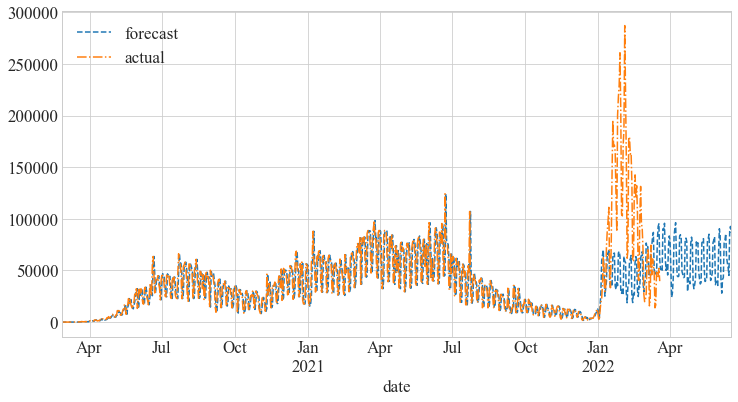

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
forecasted.set_index("date").plot(linestyle='--', ax=ax)
actual.set_index("date").plot(linestyle='-.', ax=ax)
plt.legend(["forecast", "actual"])
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error

test_data = actual.merge(forecasted, on="date", suffixes=("_actual", "_predicted"))

mse = mean_squared_error(test_data.new_cases_actual, test_data.new_cases_predicted, squared=False)  # RMSE
print("The root mean squared error (RMSE) on test set: {:.2f}".format(mse))

The root mean squared error (RMSE) on test set: 28984.26
